In [9]:
import pypsa
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import json

In [2]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline

## admittance Matrix

In [3]:
def create_admittance(data):
    n = pypsa.Network(data)
    n.determine_network_topology()
    for sub in n.sub_networks.obj:
        pypsa.pf.calculate_Y(sub)
    
    return sub.Y

In [4]:
##Erstelle Admittanzmatrix (noch mit Dateinamen hart gecodet)
x = create_admittance("elec_s_4.nc")

INFO:pypsa.io:Imported network elec_s_4.nc has buses, carriers, generators, lines, links, loads
INFO:numexpr.utils:NumExpr defaulting to 1 threads.


In [7]:
n = pypsa.Network("elec_s_4.nc")

INFO:pypsa.io:Imported network elec_s_4.nc has buses, carriers, generators, lines, links, loads


(<matplotlib.collections.PatchCollection at 0x7f4c862f6a10>,
 <matplotlib.collections.LineCollection at 0x7f4c86307890>)

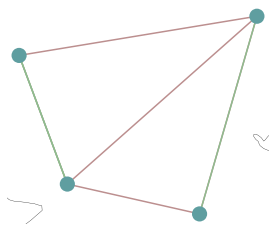

In [8]:
n.plot()

In [13]:
pd.DataFrame(x)

,0
0,"(0, 0)\t(3636.106022465493-26530.67364650634..."
1,"(0, 0)\t(-2161.2344167017477+17722.122216954..."
2,"(0, 0)\t(-946.8427641662366+7764.11066616313..."
3,"(0, 0)\t(-528.028841597509+4329.836501099575..."


In [10]:
n.generators

,p_nom_max,weight,p_nom,capital_cost,efficiency,marginal_cost,carrier,bus,p_nom_extendable,control,...,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
name,,,,,,,,,,,,,,,,,,,,,
DE0 0 CCGT,inf,0.000000,9138.300000,0.000000,0.500,47.200000,CCGT,DE0 0,False,Slack,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DE0 0 OCGT,inf,0.000000,0.000000,47234.561404,0.390,58.384615,OCGT,DE0 0,True,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DE0 0 coal,inf,0.000000,12250.979795,0.000000,0.464,24.103448,coal,DE0 0,False,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DE0 0 offwind-ac,3.148606e+03,1930.547400,0.000000,202516.726507,1.000,0.015000,offwind-ac,DE0 0,True,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DE0 0 offwind-dc,6.453463e+04,44213.514454,0.000000,247130.527227,1.000,0.015000,offwind-dc,DE0 0,True,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DE0 0 onwind,8.952059e+04,27765.031446,0.000000,109295.569252,1.000,0.015000,onwind,DE0 0,True,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DE0 0 solar,8.452914e+04,9711.589094,0.000000,55064.071419,1.000,0.010000,solar,DE0 0,True,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DE0 1 CCGT,inf,0.000000,3372.000000,0.000000,0.500,47.200000,CCGT,DE0 1,False,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DE0 1 OCGT,inf,0.000000,0.000000,47234.561404,0.390,58.384615,OCGT,DE0 1,True,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0


In [9]:
n.lpf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2013-03-01', '2013-03-02', '2013-03-03', '2013-03-04',
               '2013-03-05', '2013-03-06', '2013-03-07', '2013-03-08',
               '2013-03-09', '2013-03-10', '2013-03-11', '2013-03-12',
               '2013-03-13', '2013-03-14', '2013-03-15', '2013-03-16',
               '2013-03-17', '2013-03-18', '2013-03-19', '2013-03-20',
               '2013-03-21', '2013-03-22', '2013-03-23', '2013-03-24',
               '2013-03-25', '2013-03-26', '2013-03-27', '2013-03-28',
               '2013-03-29', '2013-03-30', '2013-03-31'],
              dtype='datetime64[ns]', name='name', freq=None)
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 627251390169273043400137319745411088384.000000 in 0.811894 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 147944938117033117837382644720992256.000000 in 0.975441 seconds
INFO:pypsa.pf:Newton-Raph

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 114866669635035435007891734920049983488.000000 in 0.996986 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4046083918197643416701065394190450425856.000000 in 1.071060 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 34404516686706503865296253533854680219648.000000 in 1.053896 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 6151106159372985960162660223102377525248.000000 in 0.872159 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4454005779039644657621506257963477630976.000000 in 0.957672 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1253002002544148198584459572932429635125248.000000 in 1.028739 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 40378680732343184794347305832342400964493312.000000 in 1.238007 seconds
INFO:pypsa.pf:Newton-Raphson solved in 10

{'n_iter':               0
 name           
 2013-03-01  100
 2013-03-02  100
 2013-03-03  100
 2013-03-04  100
 2013-03-05   97
 2013-03-06  100
 2013-03-07   93
 2013-03-08  100
 2013-03-09  100
 2013-03-10   88
 2013-03-11  100
 2013-03-12  100
 2013-03-13  100
 2013-03-14  100
 2013-03-15  100
 2013-03-16  100
 2013-03-17  100
 2013-03-18   95
 2013-03-19  100
 2013-03-20  100
 2013-03-21  100
 2013-03-22  100
 2013-03-23  100
 2013-03-24  100
 2013-03-25  100
 2013-03-26  100
 2013-03-27  100
 2013-03-28  100
 2013-03-29  100
 2013-03-30  100
 2013-03-31  100,
 'error':                        0
 name                    
 2013-03-01  6.272514e+38
 2013-03-02  1.479449e+35
 2013-03-03  1.264647e+41
 2013-03-04  1.193875e+39
 2013-03-05           NaN
 2013-03-06  4.354256e+39
 2013-03-07           NaN
 2013-03-08  1.108926e+40
 2013-03-09  2.385059e+37
 2013-03-10           NaN
 2013-03-11  1.165710e+39
 2013-03-12  2.070721e+40
 2013-03-13  3.908020e+39
 2013-03-14  1.923302e+39
 20

In [5]:
n.export_to_csv_folder('ExportTest')

INFO:pypsa.io:Exported network ExportTest has carriers, lines, generators, links, buses, loads


In [9]:
network = pypsa.Network()

In [10]:
network.import_from_csv_folder('ExportTest')

INFO:pypsa.io:Imported network ExportTest has buses, carriers, generators, lines, links, loads


In [11]:
n.pf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2013-03-31 14:00:00', '2013-03-31 15:00:00',
               '2013-03-31 16:00:00', '2013-03-31 17:00:00',
               '2013-03-31 18:00:00', '2013-03-31 19:00:00',
               '2013-03-31 20:00:00', '2013-03-31 21:00:00',
               '2013-03-31 22:00:00', '2013-03-31 23:00:00'],
              dtype='datetime64[ns]', name='name', length=744, freq=None)
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 2019705246840857536218481872569915932672.000000 in 1.158342 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 2

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 811128070420802614498719994109375807488.000000 in 0.982909 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 5664272726372329945635591642939677212672.000000 in 0.966395 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 627065776578701812690994612404713223618560.000000 in 0.966740 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 6073302206807032611854920331769566724096.000000 in 1.640713 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 6313670812109371962499134790453430321152.000000 in 0.951787 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 2936441280579477249890752841662337122304.000000 in 0.948531 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 688896687711314269257071180701109321728.000000 in 0.938616 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 itera

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 50998849560762297951798299527848881291264.000000 in 0.957260 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 2525704737886010656878402255263652380672.000000 in 0.945622 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4523204578013770817507184270819291299840.000000 in 0.951597 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1902593449499820866688230760066733572096.000000 in 0.939240 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3147114442111760890316542316382257152.000000 in 0.935145 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 64180455253865617968556626986139648.000000 in 0.946531 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1143237865032783731004524882172227616768.000000 in 0.944598 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations w

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 8008272061084360275202935289223839744.000000 in 0.936101 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 81109661167014094226858409723846448906240.000000 in 0.931933 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 57778445547314526033988271302459034435584.000000 in 0.950090 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 67839807653012453476038345182979047817216.000000 in 0.938607 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4415668784243429486047475423247008268288.000000 in 0.935563 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 6770332738530879187850803868945392599040.000000 in 0.935649 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1682577589063852209980566177296144138240.000000 in 0.952031 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 itera

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3704781074483922425965367282871409049600.000000 in 0.932309 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 14995390298054657704764425109569095598080.000000 in 0.938594 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 93652779760053534673577998809005293568.000000 in 0.941863 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 2631871562486997929344158907739316158464.000000 in 0.928933 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 218670482956869093357515351714084945920.000000 in 0.959666 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 73254436782021787948317981912609297793024.000000 in 0.954316 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4343695007455625603657486509121323663360.000000 in 0.975866 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterat

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1259465081758838061660445612830680416256.000000 in 0.973722 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 8446139631145878499081815242000696344576.000000 in 0.936274 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3069397981523663868251995628810792861696.000000 in 0.926433 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 406028829712337821178800397474661924864.000000 in 0.932685 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 96881440688878788805118991646069018853376.000000 in 0.920100 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 26169182095793853600713537054062936064.000000 in 0.925618 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 74784551858317347952413651332211574571008.000000 in 0.924942 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterat

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 124716082360217614969024133813046870016.000000 in 1.020534 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 14637243351337923875031058014091083776.000000 in 0.962606 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 50292312745991071679251164959967476187136.000000 in 0.948768 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 8886579646819581792083616240343701258240.000000 in 0.947537 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 11013067493943140799820551179269570560.000000 in 0.955343 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3419655285890045121587673269408957988864.000000 in 0.969119 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3277346108660872755075125478693011456.000000 in 0.933804 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations w

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 409138541083464809163504832928190300160.000000 in 0.936591 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 5053741678947893413501230988499101941760.000000 in 0.937222 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 2601854236698822986163179182524203008.000000 in 0.939570 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3872727404013470843230599840300030492672.000000 in 0.949639 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3837712184830617685702538760384357072896.000000 in 0.959871 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 200688831152672235063189492515358113792.000000 in 0.951119 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 273137628580980881773821989238440198144.000000 in 0.952282 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations 

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 350198789216289081563885950261702688768.000000 in 0.938395 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1163058593911923566784080984811690262528.000000 in 0.961317 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 8695124468468592992554715045498454016.000000 in 0.934237 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 234180014422898757596063370585837666304.000000 in 0.924543 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 131232028354644262371048302927685877760.000000 in 0.950210 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 20499215964468591597300485532694872064.000000 in 0.981074 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 234048944804624845339812742693442813952.000000 in 0.947870 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations wit

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4881640620516252487740327228080128.000000 in 0.941128 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 14461206497032173228826823973921159265648640.000000 in 0.931843 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 63846641763919350852667114593593933692928.000000 in 0.956028 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 30198395267058831500526878248237034110976.000000 in 0.938768 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 70128406119156374305210481435305746366464.000000 in 0.983523 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 2801785939748737879407466969135316992.000000 in 0.939992 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 22481724203702477599325244752450813952.000000 in 0.933235 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iteration

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1739711532360816204991815420376776704.000000 in 0.944405 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 54730492443661678834554912022665803857920.000000 in 0.948608 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 7323142817480718896367678869716447789056.000000 in 0.928175 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3885628682823696675478119967238633029632.000000 in 0.933326 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4646875455389971436478331857667574726656.000000 in 0.923802 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 7746686112362063185448277815366080528384.000000 in 0.941463 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4473830134252916995453548082503576631377920.000000 in 0.934263 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iter

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 41329420533173870155450511314124800.000000 in 0.958575 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 208642732306789432411840058113133241155190784.000000 in 0.975100 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4636023798628364033749910972553193360195584.000000 in 0.927568 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 26738828466379281946290142209090254798848.000000 in 0.924646 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 15707584446424168722837206363087258517504.000000 in 0.933741 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1226487767470402155288449302925695516672.000000 in 0.942768 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3327696868554529827527462226697417392128.000000 in 0.942564 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1456792403609475407121269723609927612628992.000000 in 0.958632 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 32248877281140233583893067093550039040.000000 in 0.941622 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 2654147933377154625137270061810409537536.000000 in 0.935666 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1556546531254303369295515026217500672.000000 in 0.939625 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 53907111550452649439297438542960437231616.000000 in 0.968064 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 17033286858980114699497462268914206507008.000000 in 0.948438 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1315412849344950755967171132394997547008.000000 in 0.953193 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 itera

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 15465983920330379881946623626570796892160.000000 in 1.142123 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 96924870747594891758954549903125303525376.000000 in 1.137914 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1006984703790934469619103335941348737941504.000000 in 1.345002 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 42915308961934105956044160268062469128192.000000 in 0.998513 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 14318361440736384020157769464867847143424.000000 in 0.939130 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 9627496867897844047044329882680813420544.000000 in 0.933259 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3103601532433898439571671482946813952000.000000 in 0.927972 seconds
INFO:pypsa.pf:Newton-Raphson solved in 10

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 7280918592467658707503169860361231794176.000000 in 0.932022 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 12547776120595706790115109228214862479360.000000 in 0.938491 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 30951576924437161953059617167032333631488.000000 in 0.918591 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 614721440650693373581324208474464601505792.000000 in 0.910739 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 126471345527937656552358973796897404223488.000000 in 0.897172 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 15484811415656754714866429310097759928320.000000 in 0.904949 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3569647987426314790613372839887051423744.000000 in 0.923703 seconds
INFO:pypsa.pf:Newton-Raphson solved in 10

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 631970730278830503400522409446154960896.000000 in 0.927608 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4159975157218061236765148906376057061376.000000 in 0.931335 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 10531583698629806321467708247881268854784.000000 in 0.919815 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 15011268623246876845821970755881529245696.000000 in 0.917374 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 133003019633277847306861239305943893671936.000000 in 0.918770 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 26191592332003140072935469705505842135040.000000 in 0.927957 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 8684950671872687610286215026865344610304.000000 in 0.927004 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 i

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 2232416438757315104393829153576700608512.000000 in 0.915376 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 88900072893523949509343316540988223127552.000000 in 0.918762 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 69353790777217996911848536974210214395904.000000 in 0.919845 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1166569980451488545727442773822406656.000000 in 0.916327 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 533643552807927568819019923392036864.000000 in 0.915321 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 7654513127938512904341972802722695479296.000000 in 0.905893 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 511362331539727547158421618688001946157056.000000 in 0.903649 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iteratio

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 811907582674623223875258811039088640.000000 in 0.912966 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1016049469919799678452419865975193600.000000 in 0.951915 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 50884873558949247579280393739488460800.000000 in 0.920398 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 104449699554710694432589357932085248.000000 in 0.906169 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3584724177547268024018570121702025461760.000000 in 0.914378 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 7276796314443235830714346003890721259520.000000 in 0.972743 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 60280157175714515944471313402751688376320.000000 in 0.926479 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with e

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 29317317053592189750675651775244965773312.000000 in 0.929045 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1765475282003511597961212145498108985344.000000 in 0.898729 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 271031441695709723648571059150444822528.000000 in 0.913016 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 10826991249394612337540146972340518912.000000 in 0.904652 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 30885340181338579642811832734440226816.000000 in 0.897735 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 5764480855520865074317103562275946496.000000 in 0.903850 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1273463614061198829793648808562668863488.000000 in 0.912968 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations w

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1217038594944067488140445180932011327488.000000 in 0.923658 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1444598996540460230010394767288069783552.000000 in 0.919694 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 60280157175714515944471313402751688376320.000000 in 0.909811 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 24316804568511491859559736816305176576.000000 in 0.912148 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 628566943893957160370796590294655565824.000000 in 0.920647 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 748881892943891270739721601681826250752.000000 in 0.905888 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 6283256099643578793880767856843054645248.000000 in 0.910393 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iteratio

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4199658109425573481030185269132301172736.000000 in 0.931543 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 2595819609039307871528524683163371307008.000000 in 0.964089 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4094601334167722423165131618539825790976.000000 in 0.914634 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 83732007362454837923626197168340720418816.000000 in 1.008975 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 564288339763945795919232187367415611392.000000 in 0.988136 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1899827492701544494271810473178431488.000000 in 0.911746 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3318118701434992687664768494336269615104.000000 in 0.921554 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iteratio

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3161080312580510657147528009072339058688.000000 in 0.920692 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1859653492841887537841804574690723758080.000000 in 0.928306 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3978713562294960788641741220713932521472.000000 in 0.910519 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 5605512014103133650788223392742413172736.000000 in 0.913325 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 83297840236191528498215002122964481081344.000000 in 0.925118 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 52864009101241763811866615436313362432.000000 in 0.898944 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 69489372469961309567860155458867167232.000000 in 0.904883 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iteratio

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 73512116092950598994743442445646860124160.000000 in 0.932773 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 6248044111005624842663214579282838814720.000000 in 0.918041 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4852599048369777229736196496903597195264.000000 in 0.903567 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3145962632651624697451608498565067833344.000000 in 0.896052 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 8951166232696022559755851525437152821248.000000 in 0.901224 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 556593782638020044091426952966192664412160.000000 in 0.905807 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 191281604157035217669441254192087826432.000000 in 0.923286 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 ite

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 24690294877273128834990378778191986688.000000 in 0.897114 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 51777819437547795071557253464059436597248.000000 in 0.915470 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3784970164918807055208518154276462133248.000000 in 0.904410 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 244976528867924682562679652103034503168.000000 in 0.895472 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 2047096560232971767303826735879493255168.000000 in 0.906404 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 6238379548907208264091300061233513758720.000000 in 0.919605 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3063823873570386109320290186250149691392.000000 in 0.936247 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterati

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 411641731808490668756039955262504957902848.000000 in 0.916898 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 11969517429203652088009411765289214803968.000000 in 0.911678 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4683296479194940847304780894860145065984.000000 in 0.916411 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4859210608096284848240649602945913978880.000000 in 0.904586 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1604416246116051876085952114096529735680.000000 in 0.907793 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3469939717890405301074824198491763376128.000000 in 0.919577 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 9877845090481184841356908804886757376.000000 in 0.901808 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 itera

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 43399749774208432840261693667764816838656.000000 in 0.935975 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 61630226135345594075131323525150994857984.000000 in 0.940471 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 12140489753608609941357848266971625291776.000000 in 0.926166 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 6270583077699556890063825847991605919744.000000 in 0.940637 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 2914803260245861069914232815367378436096.000000 in 0.932889 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 539147559303922586214528881612581502976.000000 in 0.962338 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 32456862859727534033782093971820904448.000000 in 0.938625 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 itera

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 355851644035282956075860343266593472512.000000 in 0.920467 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 245314747828869075205711641773135101952.000000 in 0.915789 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 46215946747425650104925754143021203456.000000 in 0.906067 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3366869011114979821585184399081656289329152.000000 in 0.919353 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 8825953709564562837549709739571787333632.000000 in 0.913414 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 5979102237352687120111569858591954305024.000000 in 0.905971 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1674956012762497171234558199007310512128.000000 in 0.911240 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterat

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3859539561562580857727876462220926779392.000000 in 0.883968 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 912769361964407129309944511201280.000000 in 0.910779 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 168781246936522547895256839083215814656.000000 in 0.914043 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 105157297699919480864540616505524486144.000000 in 0.903601 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 8495483734580206025618546443348227391488.000000 in 0.914522 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 47164505255718217101986209705371147173888.000000 in 0.897935 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3646104949369005589692573120850485575680.000000 in 0.968044 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations wi

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1199228810188175722695525737002801561600.000000 in 0.939891 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 280306575357182226399970564021476655104.000000 in 1.187813 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 161413866216997765838603939925238743040.000000 in 0.926968 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 455866452787638001389608549910315008.000000 in 0.985461 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 24914181102830427985631389080321093795840.000000 in 0.920552 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 21052463576835493949431018277014863872.000000 in 0.917864 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 46246745360439185369768083744048625483776.000000 in 0.913296 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations 

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3933281546090670403612962130170780581888.000000 in 0.921349 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1434855629524097162300737232402644992.000000 in 0.923780 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 940466404223728410086909897885249175552.000000 in 0.907333 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 59538258614909977813048303389050404864.000000 in 0.909879 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 371085059773201449864084978663424.000000 in 0.927062 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1910423179265728016301994809428373667840.000000 in 0.905590 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 55210195110091775421193174196972880396288.000000 in 0.929862 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with e

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 2066465270346554636531698493199531114496.000000 in 0.904224 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1797499218400719342131625951831164715008.000000 in 0.917723 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 8985595749726058467137507701876282359808.000000 in 0.909141 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 149009616103226469811107524883298562080768.000000 in 0.918206 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 17381810226759086448751713909094232358912.000000 in 0.921831 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 3322622612572054870761539454890992992256.000000 in 0.923623 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4505978423045359324358158641458300583936.000000 in 0.924066 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 it

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 11294895726667972336815120101040810098688.000000 in 0.911566 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4925250414164951698958478596543944327168.000000 in 0.919683 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 9903584621330217570396233210374467354624.000000 in 0.911114 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 59097761193536260660123976825694136041472.000000 in 0.907944 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4485321752228339422052978160127967232.000000 in 0.918770 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 63846641763919350852667114593593933692928.000000 in 0.917111 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 6299032034968898617948545520400878010368.000000 in 0.939250 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 itera

INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 8340860401750757838836743203578707968.000000 in 0.915067 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 84525788837918168947565129738747904.000000 in 0.920627 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 476239286828410410715557607142167274323968.000000 in 0.931591 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 491946261077676803762573458330794065920.000000 in 0.910654 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 4312042832905470683556549897503784304640.000000 in 0.913221 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 6740656546906047868972308245127674986496.000000 in 0.917386 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations with error of 1856222255726628082369683833559334256640.000000 in 0.911721 seconds
INFO:pypsa.pf:Newton-Raphson solved in 100 iterations w

{'n_iter':                        0
 name                    
 2013-03-01 00:00:00  100
 2013-03-01 01:00:00  100
 2013-03-01 02:00:00  100
 2013-03-01 03:00:00  100
 2013-03-01 04:00:00  100
 ...                  ...
 2013-03-31 19:00:00  100
 2013-03-31 20:00:00  100
 2013-03-31 21:00:00  100
 2013-03-31 22:00:00  100
 2013-03-31 23:00:00  100
 
 [744 rows x 1 columns],
 'error':                                 0
 name                             
 2013-03-01 00:00:00  2.019705e+39
 2013-03-01 01:00:00  2.712656e+39
 2013-03-01 02:00:00  4.178162e+39
 2013-03-01 03:00:00  2.730402e+41
 2013-03-01 04:00:00  4.231837e+40
 ...                           ...
 2013-03-31 19:00:00  1.856222e+39
 2013-03-31 20:00:00  4.269566e+39
 2013-03-31 21:00:00  7.466246e+38
 2013-03-31 22:00:00  2.952366e+37
 2013-03-31 23:00:00  1.534920e+36
 
 [744 rows x 1 columns],
 'converged':                          0
 name                      
 2013-03-01 00:00:00  False
 2013-03-01 01:00:00  False
 2013-03-